In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cv2
from tqdm import tqdm

In [2]:
dist = pd.read_csv('./resnet101_matches_distance.csv').values
fname = pd.read_csv('./resnet101_matches_filename.csv').values
train_xy = pd.read_csv('train.csv', index_col=0)
test_path = pd.read_csv('imagenames.csv')['id'].values

with open(f'./kmeans_coords.pckl','rb') as f:
    clustered_coords = pickle.load(f)

with open(f'./kmeans_fnames.pckl','rb') as f:
    clustered_fnames = pickle.load(f)

In [3]:
train_i = {}
test_i = {}

train_xy = pd.read_csv('train.csv')
train_path = train_xy['id'].values
test_path = pd.read_csv('imagenames.csv')['id'].values

for f in train_path:
    i = cv2.imread('./train/' + f + '.jpg')
    train_i[f] = i
for f in test_path:
    i = cv2.imread('./test/' + f + '.jpg')
    test_i[f] = i

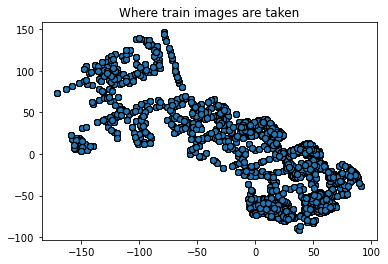

In [26]:
plt.scatter(train_xy['x'],train_xy['y'],edgecolors='black')
plt.title('Where train images are taken')
plt.show()

In [16]:
get_coord = lambda name: train_xy.loc[train_xy['id']==name,['x','y']].values

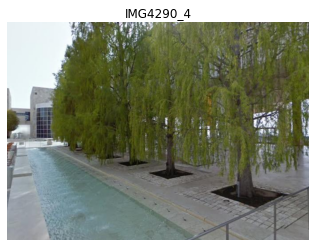

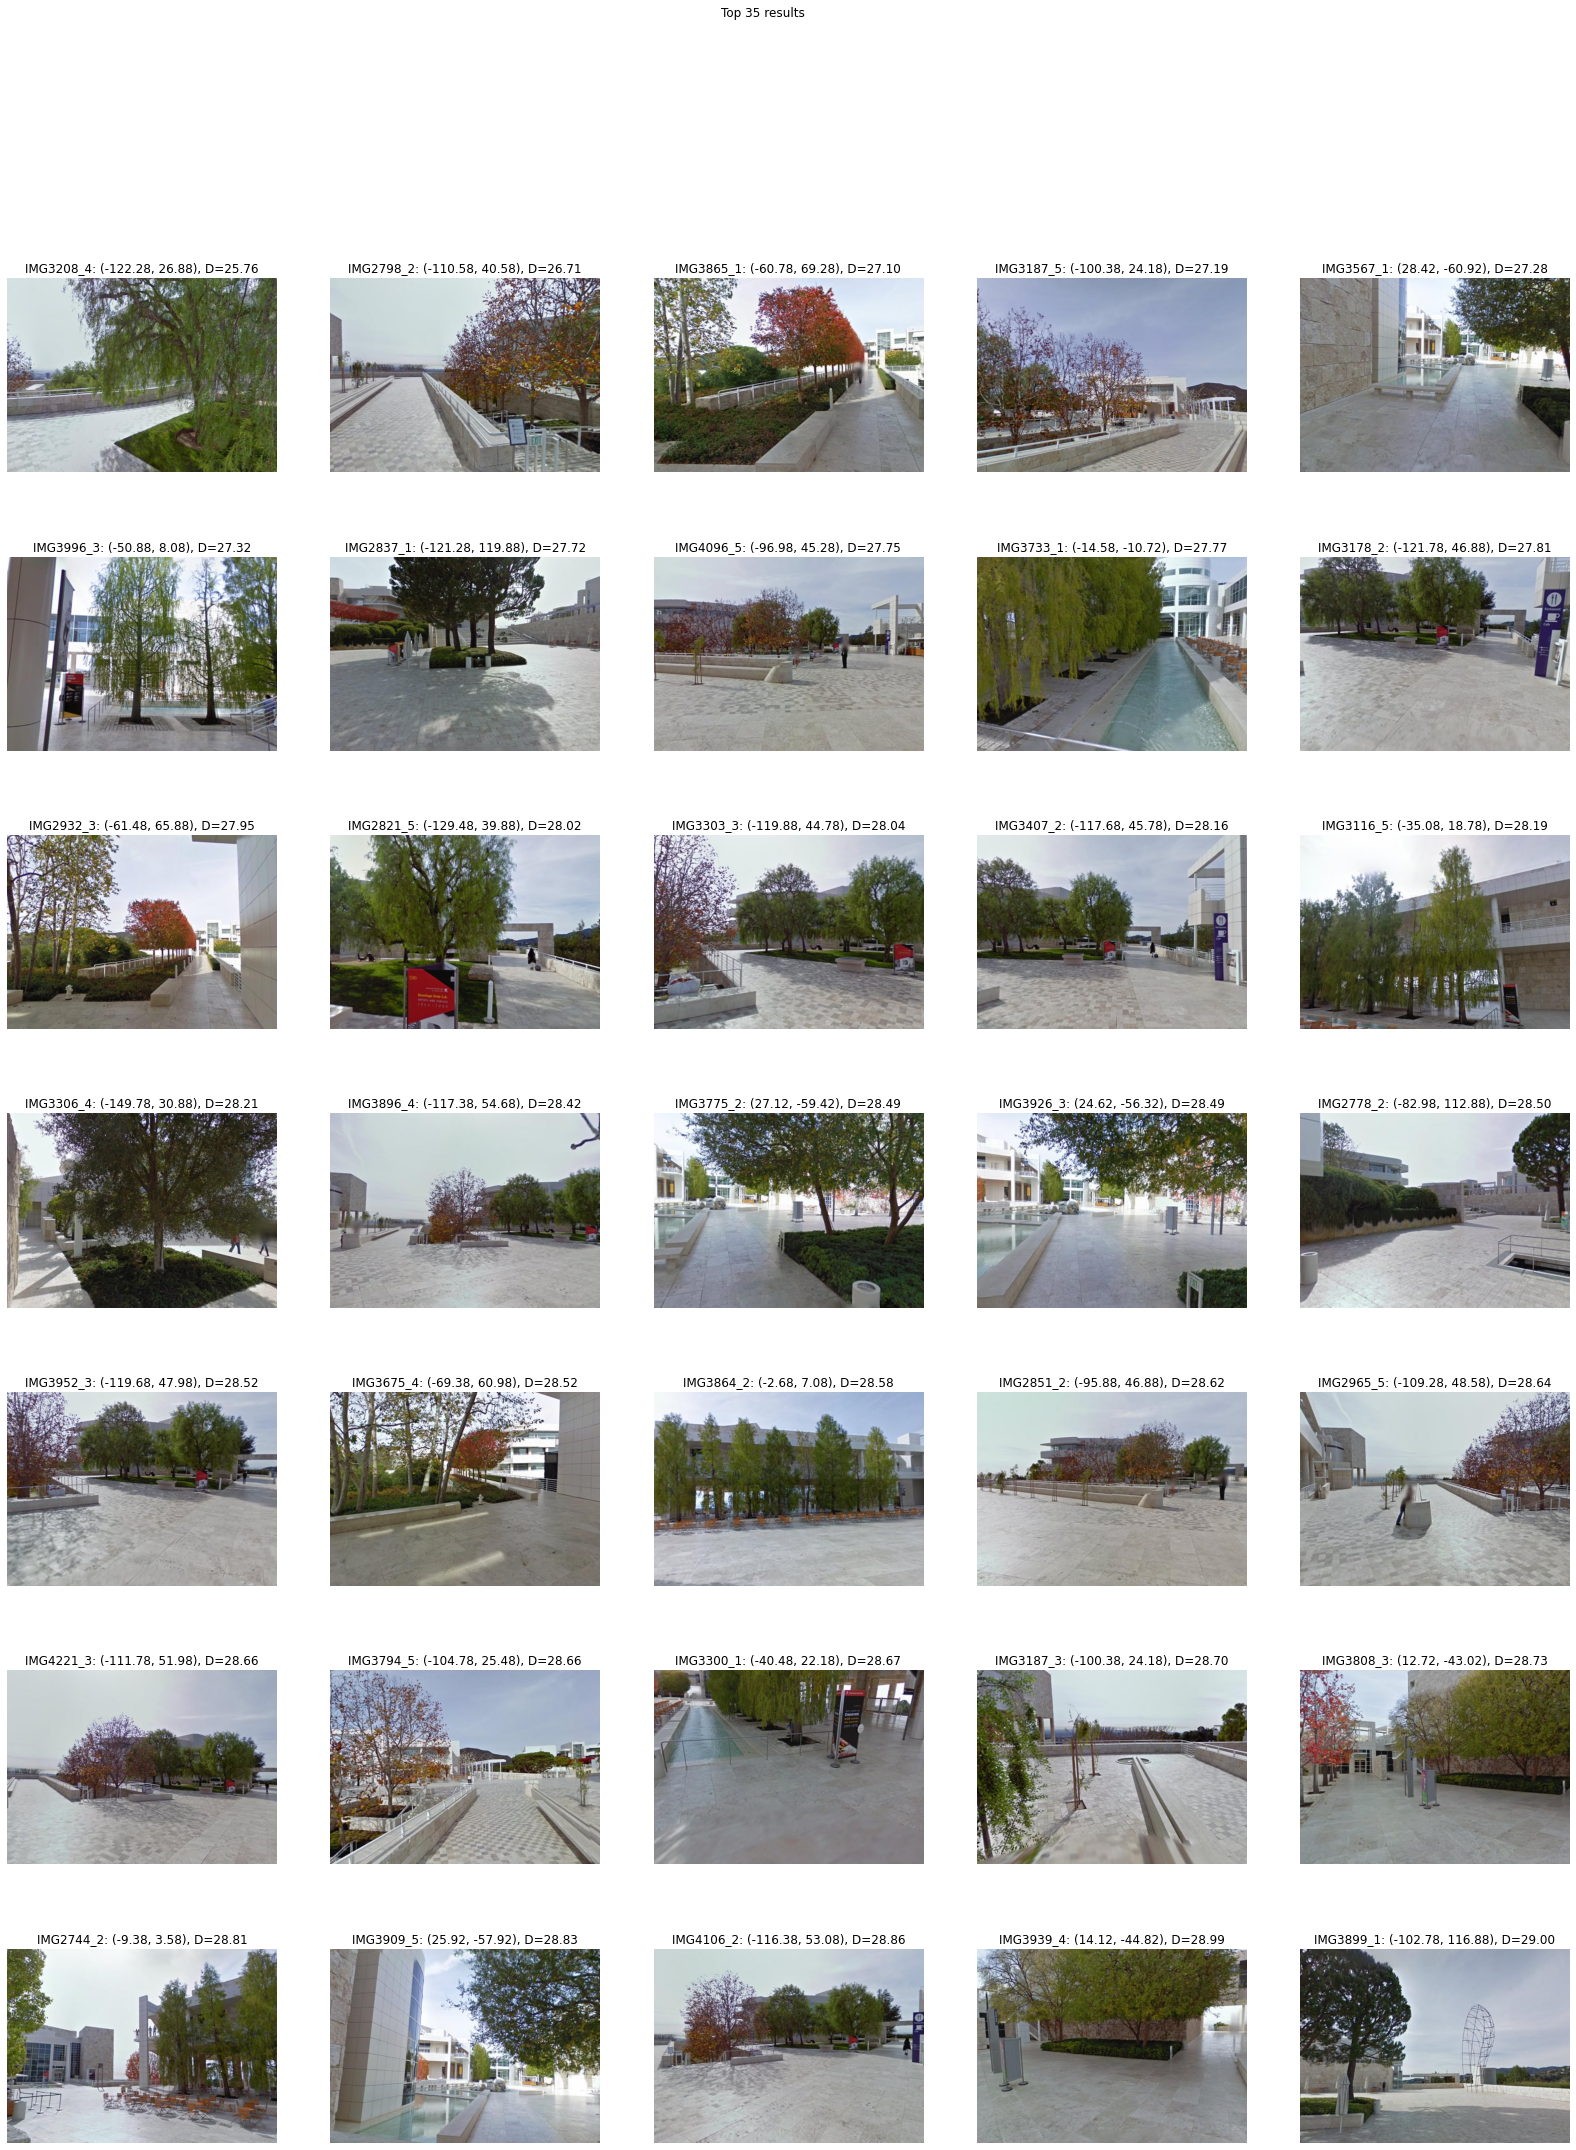

In [39]:
i=3
top = 35
test_img = test_i[test_path[i]]
train_res = fname[i,:top]

plt.imshow(test_img[:,:,::-1])
plt.title(f'{test_path[i]}')
plt.axis('off')
plt.show()

_,ax = plt.subplots(int(top/5),5,figsize=(28,5*int(top/5)))
plt.suptitle(f'Top {top} results')
for j,train in enumerate(train_res):
    train_img = train_i[train]
    coor = get_coord(train)
    ax[int(j/5),j%5].imshow(train_img[:,:,::-1])
    ax[int(j/5),j%5].set_title(f'{train}: ({coor[0,0]:.2f}, {coor[0,1]:.2f}), D={dist[i,j]:.2f}')
    ax[int(j/5),j%5].axis('off')